# Problema 4

En este ejercicio se estudia la relación entre magnitudes aparentes obtenidas para la muestra de galaxias, particularmente la relación entre las magnitudes Petrosian en las bandas r y g.
También se busca obtener un ajuste para la relación entre ambas.

In [1]:
#from math import *
import numpy as np
import matplotlib.pyplot as plt
#import random
import seaborn as sns

In [2]:
sns.set()

Se comienza exportando los valores de las magnitudes r y g de la tabla descargada.

In [3]:
#defino la petroMag_g (columna 4)
g = np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=4)

#defino la petroMag_r (columna 5)
r = np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=5) 

Text(0, 0.5, 'r')

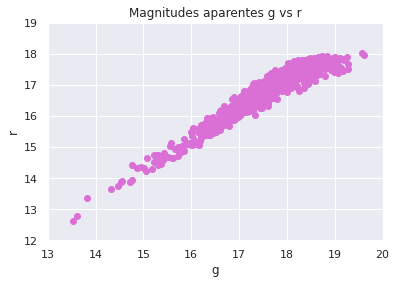

In [4]:
#grafico los puntos para ver la distribución

plt.plot(g, r, 'o', color='orchid')
plt.ylim(12,19)
plt.xlim(13,20)
plt.title('Magnitudes aparentes g vs r')
plt.xlabel('g')
plt.ylabel('r')


Debido a la forma que se observa, se busca ajustarle una recta a los puntos.

Primero se define la función 'func', la cual es una función lineal de la forma:

$$y=a.x+b$$

donde a es la pendiente y b la ordenada al origen, los parámetros que se buscan.

Para el ajuste se utiliza la función 'curve_fit' de scipy.optimize.

In [5]:
from scipy.optimize import curve_fit

In [6]:
#funcion de ajuste
def func(x,a,b):
    y=a*x+b
    return y

In [7]:
popt, pcov = curve_fit(func, g, r)

In [8]:
# parámetros óptimos hallados tal que la suma de los residuos 
#al cuadrado de "func(xdata,* popt)-ydata " se minimice.
popt

array([ 0.9999164 , -0.83017093])

In [9]:
#matriz de covarianza de los parámetros popt hallados.
#las diagonales proporcionan la varianza de la estimación del parámetro
#Para calcular un error de desviación estándar en los parámetros: "perr = np.sqrt (np.diag (pcov))"
pcov 

array([[4.36274488e-10, 1.01199803e-09],
       [1.01199803e-09, 8.73744423e-05]])

Luego de realizar el ajuste lineal de los puntos se obtienen los siguientes parámetros. Se grafica para observarlos.

In [10]:
xdata = np.linspace(0, 50, 500)

Text(0, 0.5, 'r')

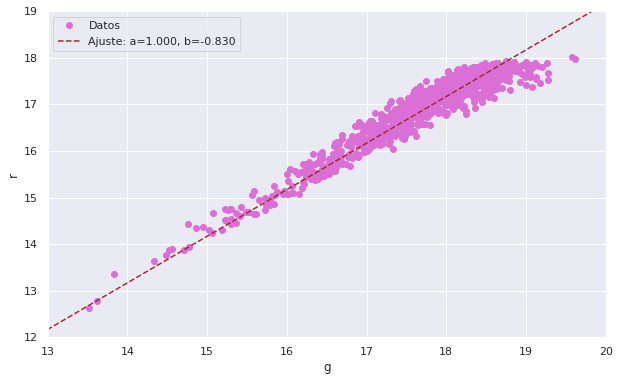

In [11]:
plt.figure(figsize=(10,6))

plt.plot(g, r, 'o', color='orchid', label='Datos')
plt.plot(xdata, func(xdata, *popt), '--', color='brown', label='Ajuste: a=%5.3f, b=%5.3f' % tuple(popt))

plt.ylim(12,19)
plt.xlim(13,20)
plt.legend(loc='best')
plt.xlabel('g')
plt.ylabel('r')

In [12]:
perr = np.sqrt (np.diag (pcov))

In [13]:
print('Parámetros de ajuste:')
print('a=', popt[0], '±', perr[0])
print('b=', popt[1], '±', perr[1])

Parámetros de ajuste:
a= 0.9999164034281535 ± 2.088718477410974e-05
b= -0.8301709346107145 ± 0.009347429718497075


Para ver la bondad del ajuste del modelo lineal a la muestra de puntos, se calcula el coeficiente de determinación ($r^2$), el cual es una medida del grado en que un conjunto de puntos admite una relación lineal.
$r^2$es un número que varía entre 0 y 1, si es cercano a 1, los puntos, en general, yacen próximos a alguna línea recta; si es cercano a 0, los puntos tienen poca tendencia a yacer sobre una línea recta. La forma que tiene es:

$$r=\frac{\sum(x_i - x_m)(y_i - y_m)}{\sqrt{\sum(x_i - x_m)^2(y_i - y_m)^2}}$$

donde $x_m,y_m$ indican el valor medio.

Se calcula a continuación para x=g, y=r.

In [15]:
#calculo de r 
n=len(g)
gm=sum(g)/n
rm=sum(r)/n
num=sum((g-gm)*(r-rm))
den=sum((g-gm)**2) * sum((r-rm)**2)
r2=(num**2)/den

print('Coeficiente de determinación: $r^2$=', r2)


Coeficiente de determinación: $r^2$= 0.9999995645254499


Se puede ver efectivamente que los pares de puntos (r,g) se ajustan a un modelo lineal.

## Conclusión

En este ejercicio se estudia como se comportan las magnitudes aparentes de las galaxias en la banda r en función de las magnitudes en la banda g. Se ve que se relacionan de manera lineal con un $r^2=0.999999$, mediante una pendiente de valor $a=  0.99992 ± 0.00002$ y una ordenada al origen de $b= -0.830 ± 0.009$.